# Steps

Important revelent libraries/modules

* **Basic EDA**
    * Imbalance Data
    * Missing Data
    * Dublicate data
    * Outliers or Anomalies
    * Data Visualization
    * Feature Encoding
    * Feature Selection

* **Model Building**
    * Seperate independent and Dependent data
    * Split data into training and testing
    * Feature Scaling
    * Model selection
    * Model Training
    * Model Prediction
    * Model Evaluation



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import xgboost
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Water Potability Prediction/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
df.shape

(3276, 10)

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Imbalance Data


In [9]:
df['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


In [10]:
len(df[df['Potability'] == 0])/len(df)  #60 percent 0 class values

0.6098901098901099

In [11]:
len(df[df['Potability'] == 1])/len(df)  #40 percent 1 class values

0.3901098901098901

## Missing Data

In [12]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [13]:
df.isnull().mean()*100

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


In [14]:
for i in df.columns:
  if df[i].isnull().sum() > 0:
    print(i)

ph
Sulfate
Trihalomethanes


ph


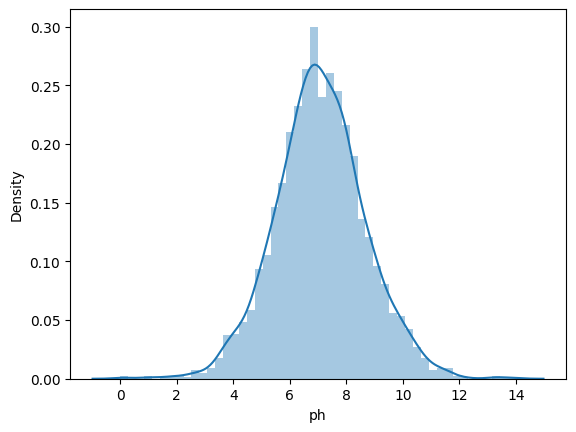

Sulfate


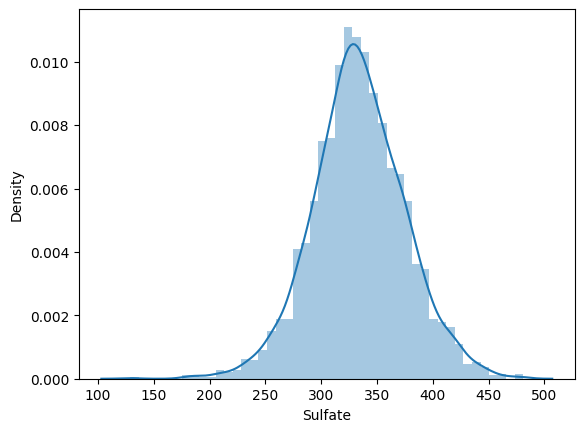

Trihalomethanes


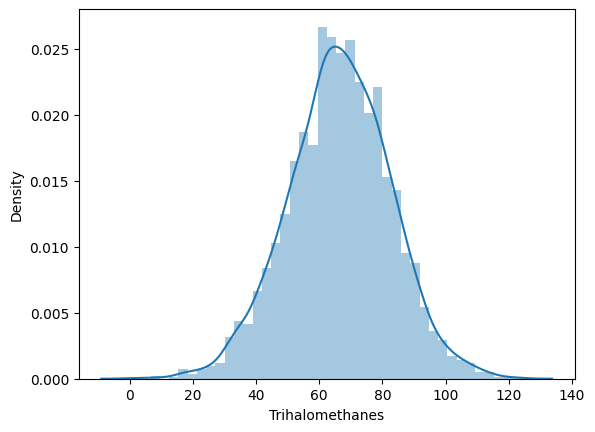

In [15]:
for i in df.columns:
  if df[i].isnull().sum() > 0:
    print(i)
    sns.distplot(df[i])
    plt.show()

In [16]:
for i in df.columns:
  if df[i].isnull().sum() > 0:
    print(i)
    print(df[i].median())
    print(df[i].mean())
    print('\n')

ph
7.036752103833548
7.080794504276835


Sulfate
333.073545745888
333.7757766108135


Trihalomethanes
66.62248509808484
66.39629294676803




In [17]:
for i in df.columns:
  if df[i].isnull().sum() > 0:
    print(i)
    df[i].fillna(df[i].median(), inplace=True)
    print('\n')

ph


Sulfate


Trihalomethanes




In [18]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Dublicate Data

In [19]:
df.duplicated().sum()

0

In [20]:
df[df.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


Outlires and Anomaly

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: \n{Q1}\n')
print(f'Q3: \n{Q3}\n')
print(f'IQR: \n{IQR}')

Q1: 
ph                     6.277673
Hardness             176.850538
Solids             15666.690297
Chloramines            6.127421
Sulfate              317.094638
Conductivity         365.734414
Organic_carbon        12.065801
Trihalomethanes       56.647656
Turbidity              3.439711
Potability             0.000000
Name: 0.25, dtype: float64

Q3: 
ph                     7.870050
Hardness             216.667456
Solids             27332.762127
Chloramines            8.114887
Sulfate              350.385756
Conductivity         481.792304
Organic_carbon        16.557652
Trihalomethanes       76.666609
Turbidity              4.500320
Potability             1.000000
Name: 0.75, dtype: float64

IQR: 
ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609


In [22]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f'Lower Limit: \n{lower_limit}\n')
print(f'Upper Limit: \n{upper_limit}\n')

Lower Limit: 
ph                    3.889107
Hardness            117.125160
Solids            -1832.417449
Chloramines           3.146221
Sulfate             267.157960
Conductivity        191.647579
Organic_carbon        5.328026
Trihalomethanes      26.619225
Turbidity             1.848797
Potability           -1.500000
dtype: float64

Upper Limit: 
ph                    10.258615
Hardness             276.392834
Solids             44831.869873
Chloramines           11.096086
Sulfate              400.322434
Conductivity         655.879140
Organic_carbon        23.295427
Trihalomethanes      106.695040
Turbidity              6.091233
Potability             2.500000
dtype: float64



In [23]:
df = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


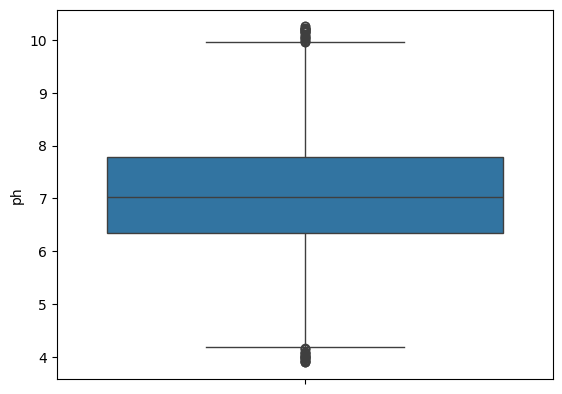

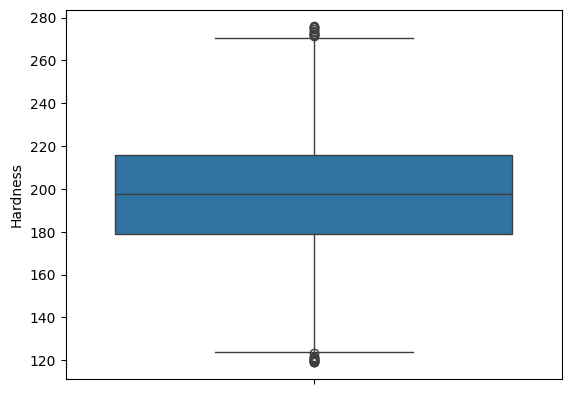

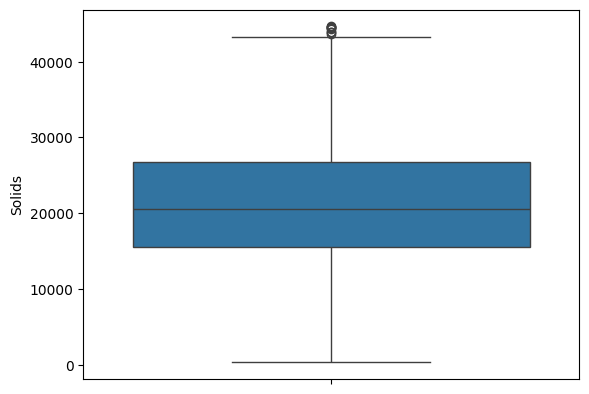

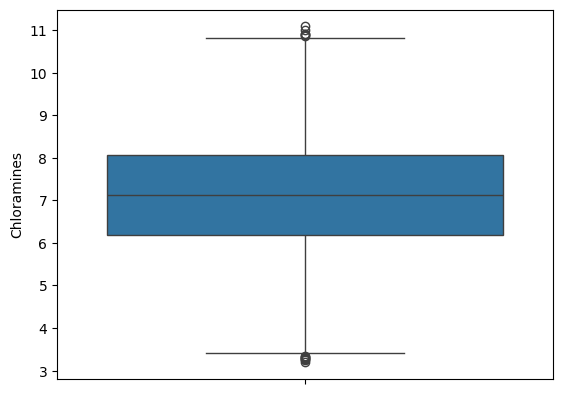

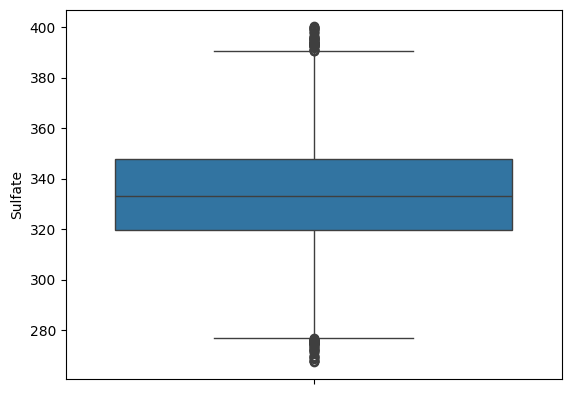

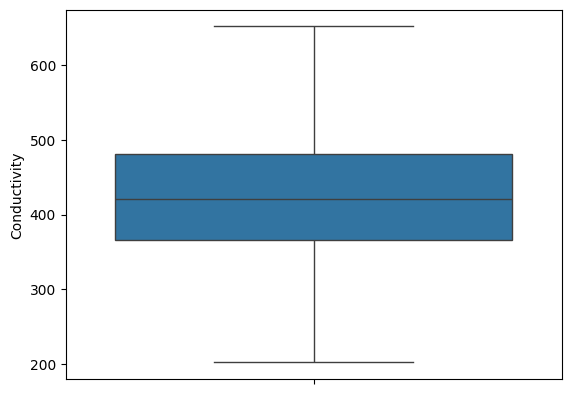

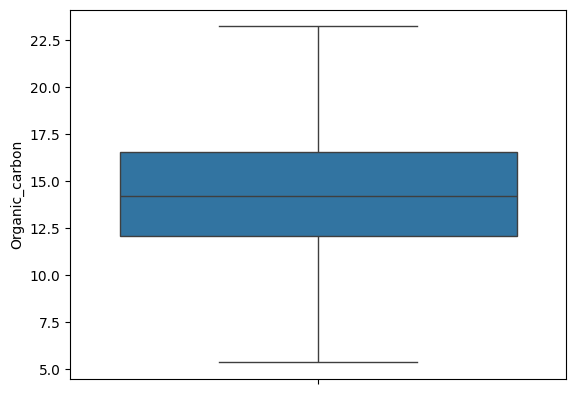

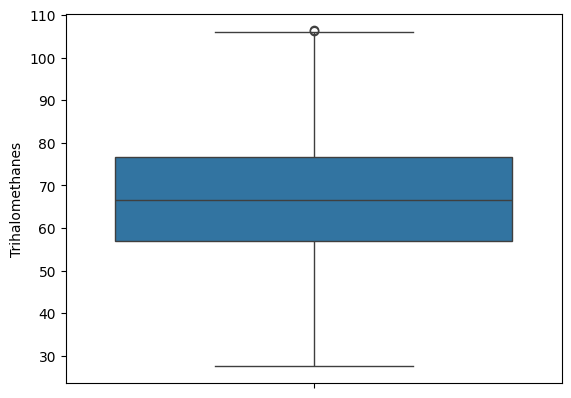

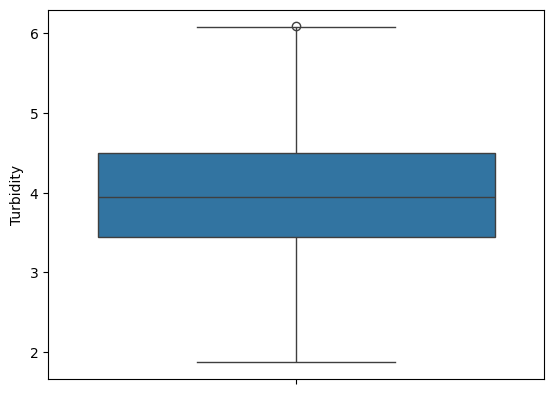

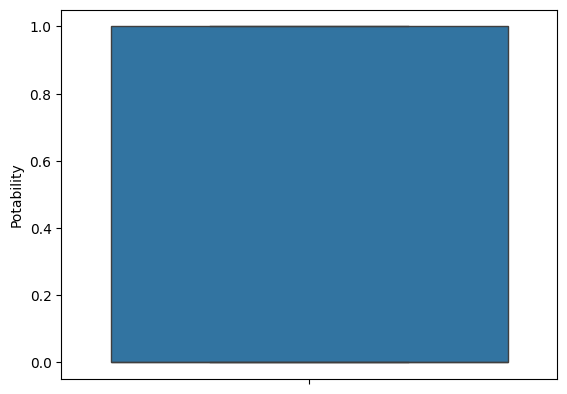

In [24]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

## Feature Selcetion

In [25]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.131282,-0.086986,-0.062773,0.016465,0.002192,0.026461,0.009309,-0.042813,-0.005499
Hardness,0.131282,1.000000,-0.045552,-0.035832,-0.027797,-0.030415,0.012463,-0.007059,-0.022362,-0.000710
Solids,-0.086986,-0.045552,1.000000,-0.040392,-0.109980,0.007087,0.026793,-0.024442,0.022801,0.005600
Chloramines,-0.062773,-0.035832,-0.040392,1.000000,0.024519,-0.015277,-0.000684,0.016538,-0.005415,0.013195
Sulfate,0.016465,-0.027797,-0.109980,0.024519,1.000000,-0.005927,-0.007304,-0.022391,-0.017396,-0.003876
Conductivity,0.002192,-0.030415,0.007087,-0.015277,-0.005927,1.000000,0.006515,-0.001196,0.007674,-0.001886
Organic_carbon,0.026461,0.012463,0.026793,-0.000684,-0.007304,0.006515,1.000000,-0.000050,-0.016705,-0.027090
Trihalomethanes,0.009309,-0.007059,-0.024442,0.016538,-0.022391,-0.001196,-0.000050,1.000000,-0.024258,0.014274
Turbidity,-0.042813,-0.022362,0.022801,-0.005415,-0.017396,0.007674,-0.016705,-0.024258,1.000000,0.004761
Potability,-0.005499,-0.000710,0.005600,0.013195,-0.003876,-0.001886,-0.027090,0.014274,0.004761,1.000000


In [26]:
df.corr()['Potability']

,Potability
ph,-0.005499
Hardness,-0.000710
Solids,0.005600
Chloramines,0.013195
Sulfate,-0.003876
Conductivity,-0.001886
Organic_carbon,-0.027090
Trihalomethanes,0.014274
Turbidity,0.004761
Potability,1.000000


## Model Building

### Split into independent  and dependent

In [27]:
X = df.drop('Potability', axis=1)
y = df['Potability']

### Split into train and test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((2132, 9), (534, 9))

### Scaling down

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Selcetion

Using logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
print(f'Training Accuracy : {round(lr.score(X_train, y_train), 2)*100}%')
print(f'Testing Accuracy : {round(lr.score(X_test, y_test), 2)*100}%')

Training Accuracy : 62.0%
Testing Accuracy : 64.0%


Using Decision Tree

In [33]:
dtree = DecisionTreeClassifier(max_depth = 5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
print(f'Training Accuracy : {round(dtree.score(X_train, y_train), 2)*100}%')
print(f'Testing Accuracy : {round(dtree.score(X_test, y_test), 2)*100}%')

Training Accuracy : 70.0%
Testing Accuracy : 63.0%


Using Xgboost

In [35]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)